In [2]:
import numpy as np
import pandas as pd  # type: ignore
import matplotlib.pyplot as plt # type: ignore
import pymc as pm   # type: ignore
import arviz as az   # type: ignore

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [115]:
# ### Exercise 1 (max 1 points)
#
# The file [trillium.csv](./trillium.csv) The first four columns are metadata columns, and contain 
# information about the geographic distribution of each species (endemic v. widespread), the species
#  specific epithet, the average probability of seed removal in the field, and two-letter 
# abbreviation for the study site from which the sample was collected 
# ("TB" = Tilton Bridge, "PB" = Pocket Branch, "OM" = Old Mine, "CA" = Cave, "WF" = WhiteWater Falls, "BR" = Boat Ramp, and "JG" = Jocassee Gorges). 
# The remaining columns are the names of chemical compounds identified using Liquid-chromatography mass spectrometry. Each cell contains the raw area under the curve for each compound in each sample.
#
# Load the data in a Pandas dataframe.

data= pd.read_csv("trillium.csv")


In [116]:
 ### Exercise 2 (max 2 points)
#
# Add a column `Location` with the complete name of the site where the sample was collected.
data.loc[data.Site == "TB","Location" ] = "Tilton Bridge "
data.loc[data["Site"] == "BR", "Location"] = "Boat Ramp"
data.loc[data.Site == "JG", "Location"] = "Jocassee Gorges"
data.loc[data.Site == "PB", "Location"] = "Pocket Branch"
data.loc[data.Site == "OM", "Location"] = "Old Mine"
data.loc[data.Site == "CA", "Location"] = "Cave"
data.loc[data.Site == "WF", "Location"] = " WhiteWater Falls"

data

,Status,Species,Prob.Rem,Site,Pyruvate,Alanine/Sarcosine,Lactate,Dimethylglycine,Serine,Glycerate,...,S-Adenosyl-L-methioninamine,GMP,Sedoheptoluse bisphosphate,S-Adenosyl-L-homocysteine,Trehalose 6-phosphate,CDP-ethanolamine,UDP-N-acetylglucosamine,Glutathione disulfide,NAD+,Location
0,endemic,lancifolium,0.107,TB,19100000.0,5604856,15200000.0,2121069.0,6247380.0,68400000.0,...,43471.970,30594.440,2601.826,15077.180,46639.1600,84447.0000,1052720.000,36736.180,18677.4200,Tilton Bridge
1,endemic,lancifolium,0.107,TB,8346788.0,3225865,12700000.0,3777022.0,4796750.0,61400000.0,...,273795.400,19026.300,7987.722,30680.780,42030.3500,38138.1100,1158912.000,1084472.000,21363.5700,Tilton Bridge
2,endemic,lancifolium,0.107,TB,16600000.0,5689448,17100000.0,1733311.0,5331194.0,61900000.0,...,290189.200,34069.440,0.000,7451.405,20081.2800,81851.6800,452726.000,33777.250,6562.2170,Tilton Bridge
3,endemic,lancifolium,0.107,TB,3376461.0,2530898,11800000.0,1069355.0,2860874.0,23500000.0,...,20533.930,15228.270,0.000,1722.833,956.5025,1942.4030,5781.486,1344.726,0.0000,Tilton Bridge
4,endemic,lancifolium,0.107,TB,5300834.0,2311523,14000000.0,1078616.0,3826501.0,79900000.0,...,298648.400,191867.700,40630.380,2679.455,16010.4500,88270.6300,930562.500,1426.180,17763.2200,Tilton Bridge
5,endemic,lancifolium,0.107,TB,15200000.0,4722197,15400000.0,1950224.0,6712178.0,107000000.0,...,2072116.000,121515.200,88631.880,2004.190,32971.8500,121720.0000,1816984.000,157202.700,38194.4400,Tilton Bridge
6,endemic,decumbens,0.022,PB,22200000.0,3895316,17300000.0,6254780.0,6258476.0,63500000.0,...,597757.100,126999.700,9551.801,18306.850,102802.2000,22522.3700,897794.200,424319.700,43352.8900,Pocket Branch
7,endemic,decumbens,0.022,PB,20700000.0,5281858,16800000.0,5300514.0,4967487.0,43000000.0,...,784351.900,17517.970,3071.494,22925.720,50615.8100,63875.1700,537993.000,121019.200,18269.2900,Pocket Branch
8,widespread,cuneatum,0.125,PB,11100000.0,2683240,14400000.0,2865170.0,3991158.0,50400000.0,...,318099.200,36070.880,0.000,11883.250,23816.0600,2864.3050,341216.100,122502.700,4173.1090,Pocket Branch
9,widespread,cuneatum,0.125,PB,7218364.0,2482212,11900000.0,1494290.0,3739917.0,46900000.0,...,81891.130,16729.480,0.000,9473.704,3106.2060,3750.3590,77821.690,63415.610,10134.9300,Pocket Branch


In [117]:
### Exercise 3 (max 8 points)
#
# Define a function `averages` that takes a list of floats and returns a list of averages on the triplet of the ordered values of the input list. 
# For example if the input values are `6.0, 1.0, 5.0, 2.0, 4.0, 3.0` the result is the list `[2.0, 5.0]` (the average of `1.0, 2.0, 3.0` and the average of `4.0 5.0 6.0`). 
# If the number of values is not a multiple of three, the last average is computed on a smaller set.
#
#
# To get the full marks, you should declare correctly the type hints and add a test within a doctest string.

#splits = [old_list[i:i+3] for i in range(0,len(old_list),3)]

def average (x:list) -> list:
    output= []
    x.sort()
    #print (ord)
    for i in range (0, len(x), 3):
        split = x[i:i+3]   #BRILLIANT!!!!
        #print (split)
        avg= np.mean(split)
        output.append(avg) 

    return output

if __name__ == "__main__":
    import doctest
    doctest.testmod()

#test= [50, 3, 4, 6, 13, 24, 22, 23]
#average(test)

In [129]:
index= data.columns.get_loc("Citrulline")
index

67

In [119]:
 ### Exercise 4 (max 4 points)
#
# Apply the function defined in Exercise 3 on the values of `Citrulline` collected at "Tilton Bridge".

indices = np.where (data.Site == "TB")
indices

for i in indices:
    en = []
    en.append(data.loc[i, "Citrulline"])

l= [667887.80, 447961.50, 497449.30, 90455.94, 781883.80, 2326019.00]
average(l)


[345288.91333333333, 1258596.8666666667]

In [121]:
 ### Exercise 5 (max 4 points)
# Add a column to the data with, for each row, the highest value of all the chemical compounds identified using Liquid-chromatography mass spectrometry.

data["heavy"] = (data.iloc[:, 4:-2].max(axis=1))

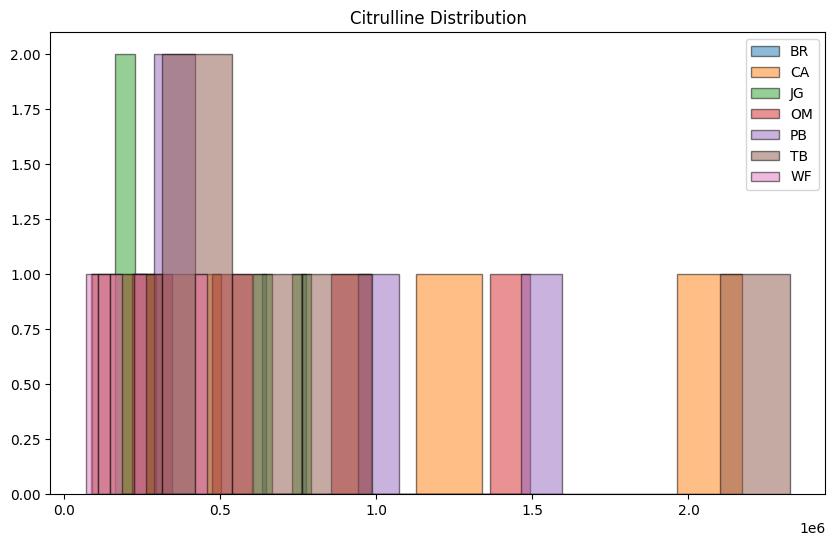

In [140]:
### Exercise 6 (max 5 points)
#
# Plot together the histograms of `Citrulline` for each collection Location.

place = data.groupby("Site")
plt.figure(figsize=(10, 6))

for (name, group) in place:
    plt.hist(group["Citrulline"], bins= 10, alpha=0.5, label=name, edgecolor="black")
    plt.legend()
    plt.title("Citrulline Distribution")

Text(0.5, 1.0, 'x y Ratio')

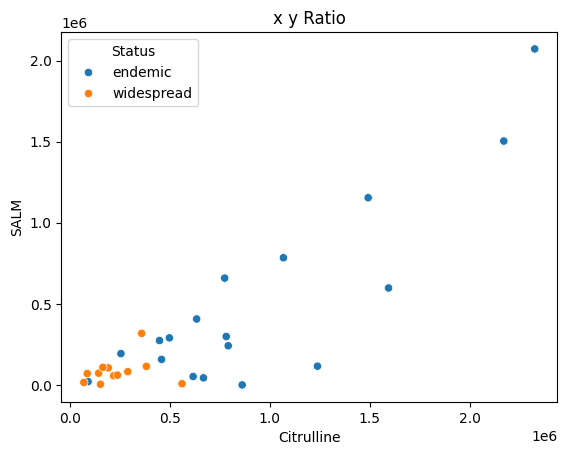

In [141]:
 ### Exercise 7 
#
# Make a scatter plot of `Citrulline` vs. `S-Adenosyl-L-methioninamine`. Color the points according to the `Status`.

import seaborn as sns

sns.scatterplot(data=data, x='Citrulline', y='S-Adenosyl-L-methioninamine', hue='Status')   #SUPER!!!!!! 
plt.xlabel ("Citrulline") 
plt.ylabel("SALM")
plt.title ("x y Ratio")

In [143]:
### Exercise 8 (max 4 points)
#
# Consider this statistical model:
#
# - a parameter $\alpha$ is normally distributed with $\mu = 0$ and $\sigma = 1$
# - a parameter $\beta$ is normally distributed with $\mu = 1$ and $\sigma = 1$
# - a parameter $\gamma$ is exponentially distributed with $\lambda = 1$
# - the observed `Citrulline` is normally distributed with standard deviation $\gamma$ and a mean given by $\alpha + \beta \cdot S$ (where $S$ is the correspondig value of `S-Adenosyl-L-methioninamine`).
#
# Code this model with pymc, sample the model, and plot the summary of the resulting estimation by using `az.plot_posterior`.


import pymc as pm

#Define the likelihood for the observed data weight_obs as normally distributed with mean mu and standard deviation gamma.
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sigma=1)
    beta = pm.Normal('beta', mu=1, sigma=1)
    gamma = pm.Exponential('gamma', lam=1)  

    # Expected value of outcome
    mu = alpha + beta * data['S-Adenosyl-L-methioninamine']  #sto stimando la distribuzione del V
 
    # Likelihood (sampling distribution) of observations
    weight_obs = pm.Normal('weight_obs', mu=mu, sigma=gamma, observed=data['Citrulline'])

    # Draw samples
    trace = pm.sample(50)

Only 50 samples in chain.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, gamma]


Sampling 4 chains for 1_000 tune and 50 draw iterations (4_000 + 200 draws total) took 61 seconds.
The number of samples is too small to check convergence reliably.


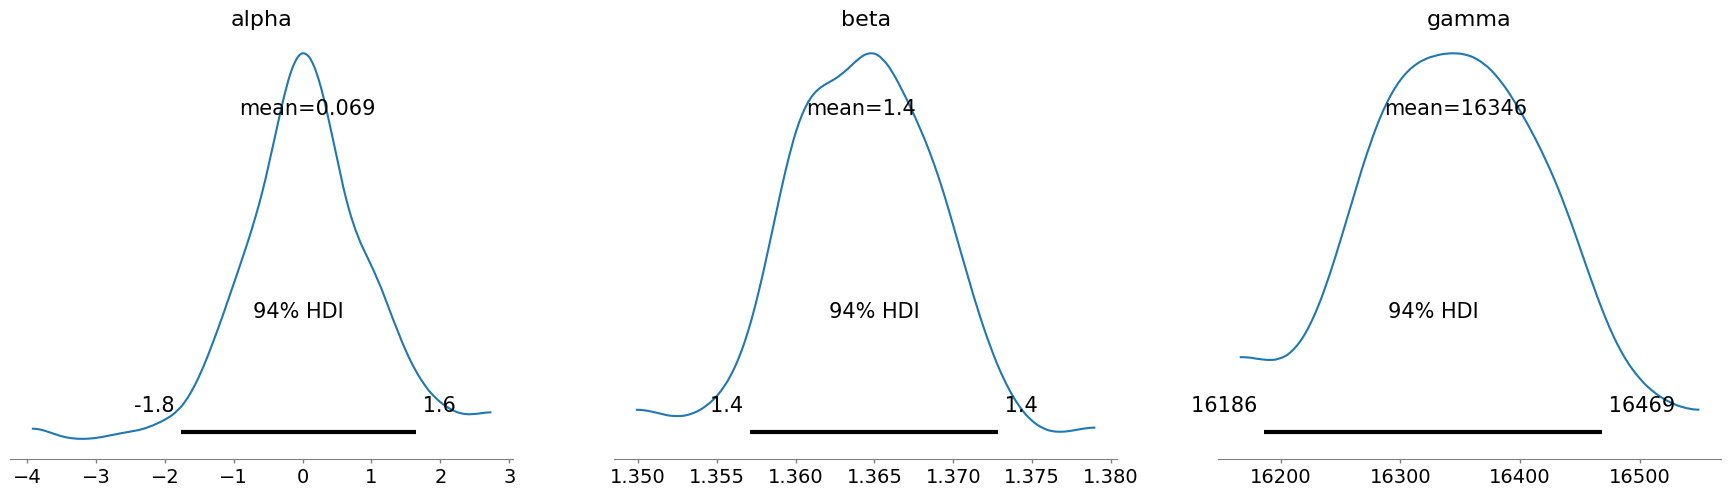

In [144]:
az.plot_posterior(trace)
plt.show()